<a href="https://colab.research.google.com/github/Sahar-DataScience/random/blob/main/IOvision_Tech_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task**:
1.  **Train a classifier to predict the class: 0 or 1.**
2.   **Use F1 score as evaluation metric.**
1.  **Feel free to use any programming language you are comfortable with.**
2.   **Use any library you are comfortable with.**
1. **Share the code and presentation explaining the details of the code and results.**

# **Import libraries**

In [ ]:
import numpy as np
from numpy.random import *
from math import*
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot  as plt 

# **import data**

In [ ]:
data=pd.read_excel('/content/sample_data/dataIOvision.xlsx')


Visualize the data frame

In [ ]:
data.head(100)

,ID,Gender,Nationality,Major,Level,IE1,SMSK3,RAS1,RAS2,SMSK1,SMSK4,IE2,TL1,RAS3,IE3,RAS4,RAS5,IE4,SMSK2,TL2,TL3,PSD1,PSD2,PSD3,IE5,PSD4,PSD5,IM1,IM2,IM3,IM4,IM5,IM6,W1,W2,W3,Employed,Score,Class
0,1,0,1,0,2,4,3,4,4,2,3,3,3,4,3,3,2,4,3,3,4,3,3,4,3,3,3,4,4,4,4,4,4,4.0,4.0,4.0,1.0,3.20,1
1,2,0,0,0,2,4,4,4,4,3,3,4,4,3,4,4,2,4,4,4,4,4,3,3,4,4,3,3,4,4,3,4,4,3.0,4.0,3.0,0.0,3.82,1
2,3,0,1,0,1,3,2,3,4,3,3,4,2,4,3,3,2,3,3,2,3,2,3,3,3,3,3,4,4,3,4,4,3,4.0,4.0,2.0,1.0,3.75,1
3,4,1,1,1,3,4,4,4,4,4,3,4,4,4,4,4,3,4,3,3,4,3,4,3,3,4,4,4,4,4,4,4,4,3.0,4.0,4.0,1.0,3.70,1
4,5,0,0,0,2,4,3,3,4,3,3,4,4,4,3,3,3,3,3,3,3,4,3,4,3,3,4,3,3,4,3,3,3,4.0,4.0,2.0,1.0,3.82,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,0,0,2,4,2,4,4,1,4,3,3,3,1,1,1,3,2,4,3,2,3,2,2,2,2,2,3,4,1,2,2,3.0,2.0,3.0,1.0,3.89,0
96,97,0,0,0,2,3,3,3,2,2,3,3,3,2,3,2,2,3,3,2,4,3,3,2,2,3,3,2,2,3,3,3,3,4.0,4.0,3.0,1.0,4.00,0
97,98,0,0,1,2,4,3,3,4,3,3,3,3,4,4,3,2,3,3,3,4,3,3,2,3,3,2,3,3,3,2,3,3,NaN,NaN,1.0,0.0,3.80,0
98,99,0,0,1,2,4,4,4,4,4,4,4,4,4,4,4,3,4,4,4,4,4,4,4,4,4,4,4,3,4,3,4,4,4.0,4.0,NaN,1.0,3.76,1


data frame statistics

In [ ]:
data.describe(include='all')

,ID,Gender,Nationality,Major,Level,IE1,SMSK3,RAS1,RAS2,SMSK1,SMSK4,IE2,TL1,RAS3,IE3,RAS4,RAS5,IE4,SMSK2,TL2,TL3,PSD1,PSD2,PSD3,IE5,PSD4,PSD5,IM1,IM2,IM3,IM4,IM5,IM6,W1,W2,W3,Employed,Score,Class
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,241.000000,246.000000,210.000000,258.000000,260.000000,260.000000
mean,130.500000,0.400000,0.303846,0.453846,1.973077,3.523077,3.226923,3.476923,3.542308,3.073077,3.215385,3.492308,3.446154,3.457692,3.311538,3.473077,2.800000,3.315385,3.300000,3.253846,3.473077,3.442308,3.334615,3.230769,3.161538,3.226923,3.173077,3.338462,3.392308,3.557692,3.426923,3.376923,3.265385,3.344398,3.394309,2.566667,0.848837,3.510577,0.488462
std,75.199734,0.490843,0.460804,0.498825,0.442926,0.592298,0.744637,0.654245,0.629195,0.851099,0.702831,0.599178,0.692615,0.709926,0.724010,0.688604,0.882258,0.692314,0.710104,0.738479,0.682974,0.675365,0.627209,0.761410,0.764096,0.696410,0.733141,0.838770,0.760980,0.652097,0.728916,0.768747,0.807036,0.852484,0.794758,1.144085,0.358904,0.452017,0.500831
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,65.750000,0.000000,0.000000,0.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,3.430000,0.000000
50%,130.500000,0.000000,0.000000,0.000000,2.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,1.000000,3.510000,0.000000
75%,195.250000,1.000000,1.000000,1.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,3.710000,1.000000
max,260.000000,1.000000,1.000000,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 39 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           260 non-null    int64  
 1   Gender       260 non-null    int64  
 2   Nationality  260 non-null    int64  
 3   Major        260 non-null    int64  
 4   Level        260 non-null    int64  
 5   IE1          260 non-null    int64  
 6   SMSK3        260 non-null    int64  
 7   RAS1         260 non-null    int64  
 8   RAS2         260 non-null    int64  
 9   SMSK1        260 non-null    int64  
 10  SMSK4        260 non-null    int64  
 11  IE2          260 non-null    int64  
 12  TL1          260 non-null    int64  
 13  RAS3         260 non-null    int64  
 14  IE3          260 non-null    int64  
 15  RAS4         260 non-null    int64  
 16  RAS5         260 non-null    int64  
 17  IE4          260 non-null    int64  
 18  SMSK2        260 non-null    int64  
 19  TL2     

data visualization

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


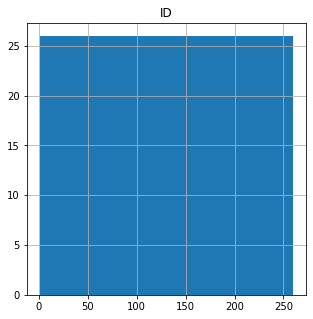

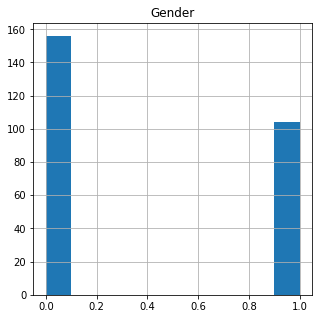

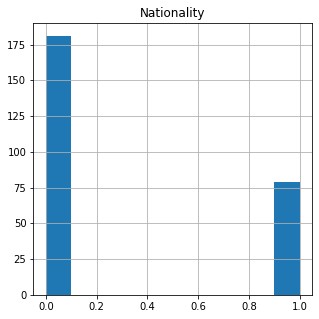

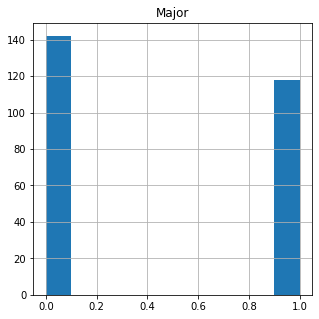

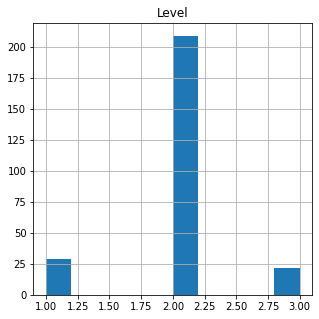

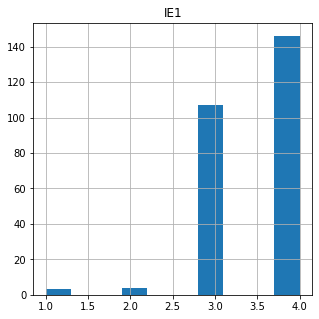

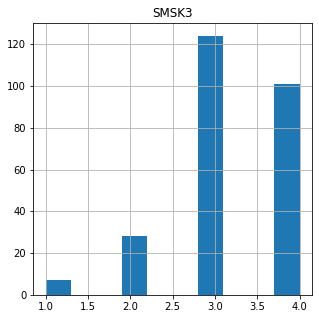

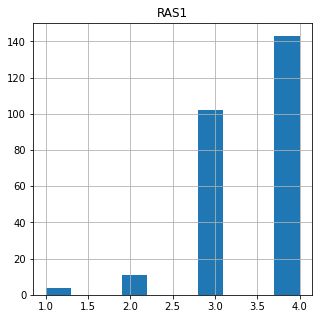

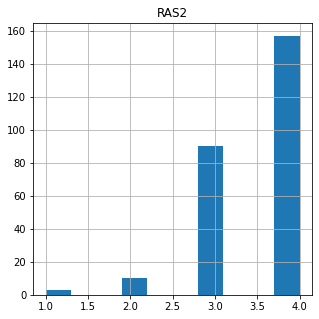

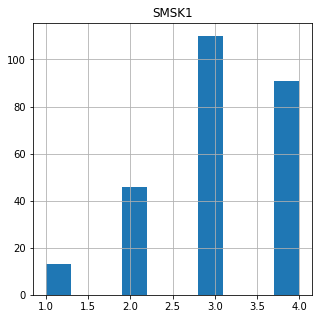

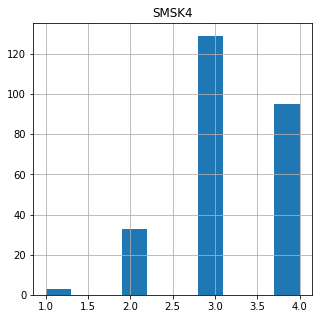

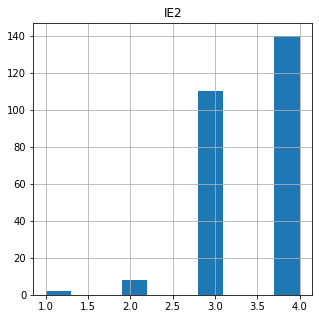

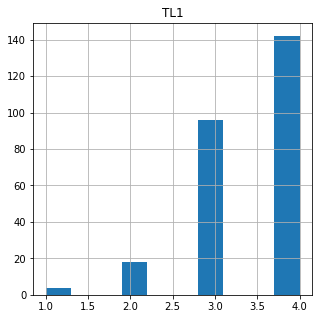

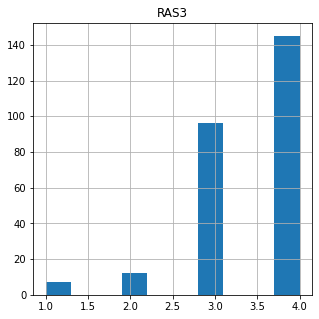

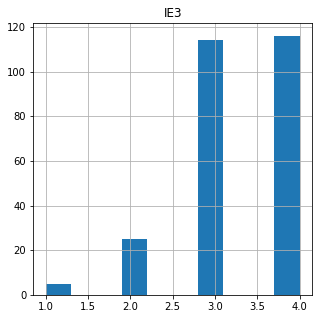

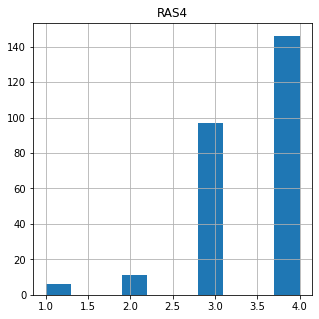

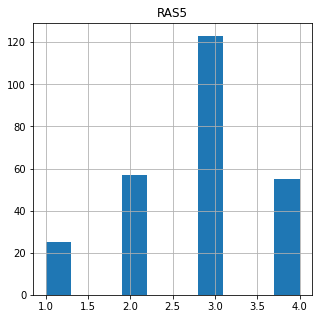

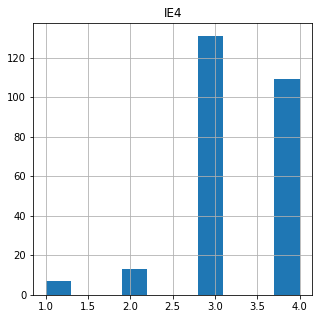

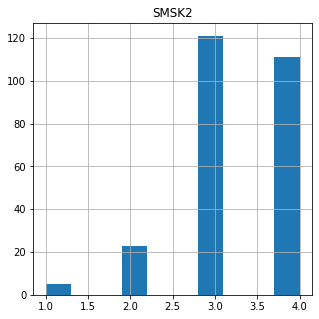

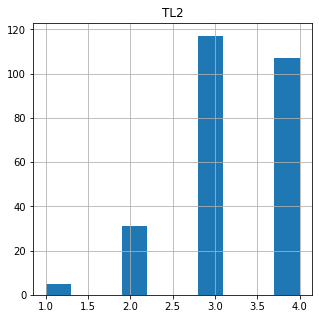

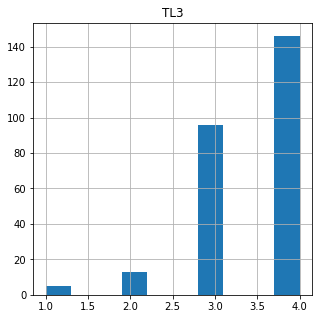

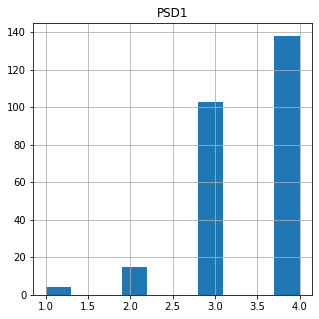

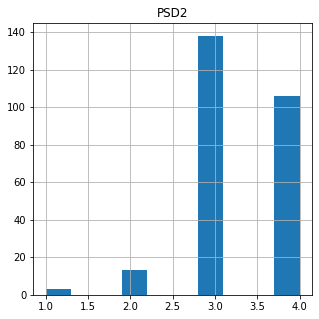

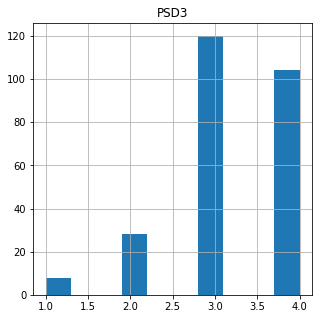

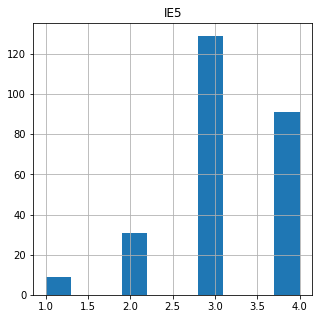

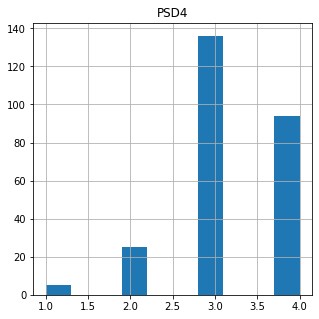

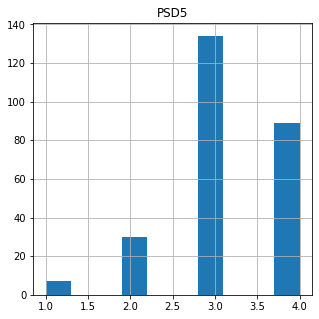

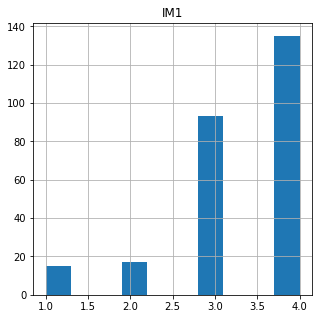

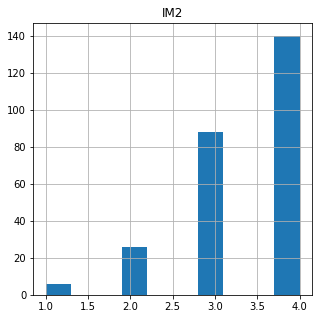

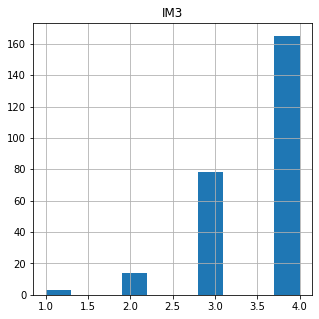

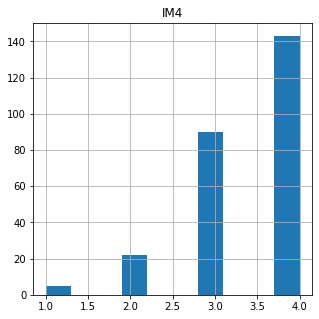

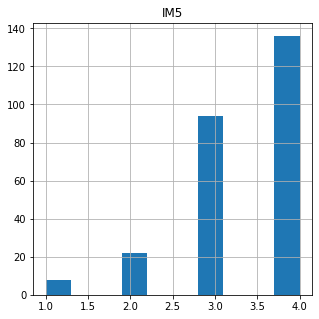

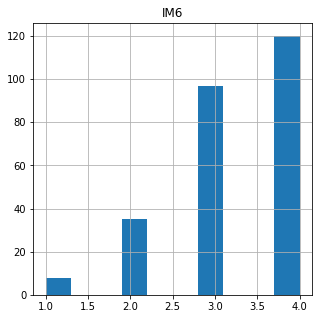

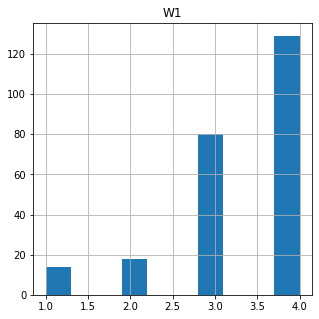

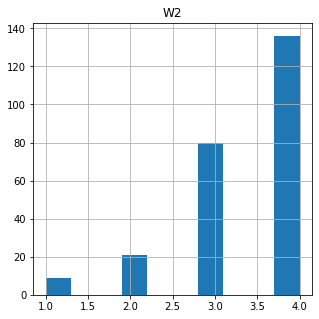

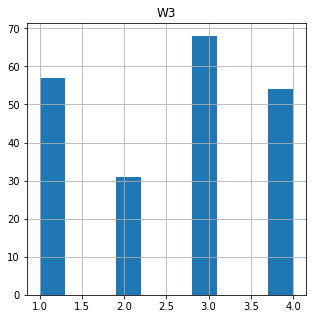

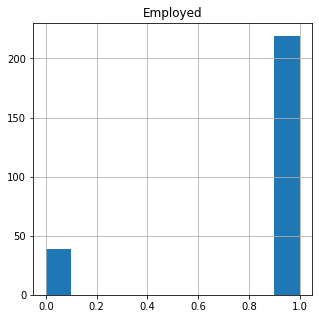

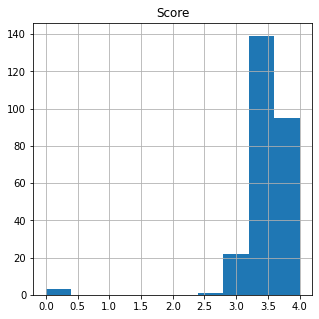

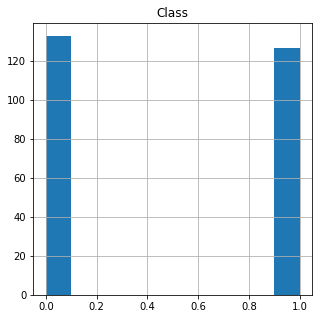

In [ ]:
Lst=data.columns.to_list()
for col in Lst:
  data.hist(column=col,figsize=(5,5))
plt.show()

## **data correlation**

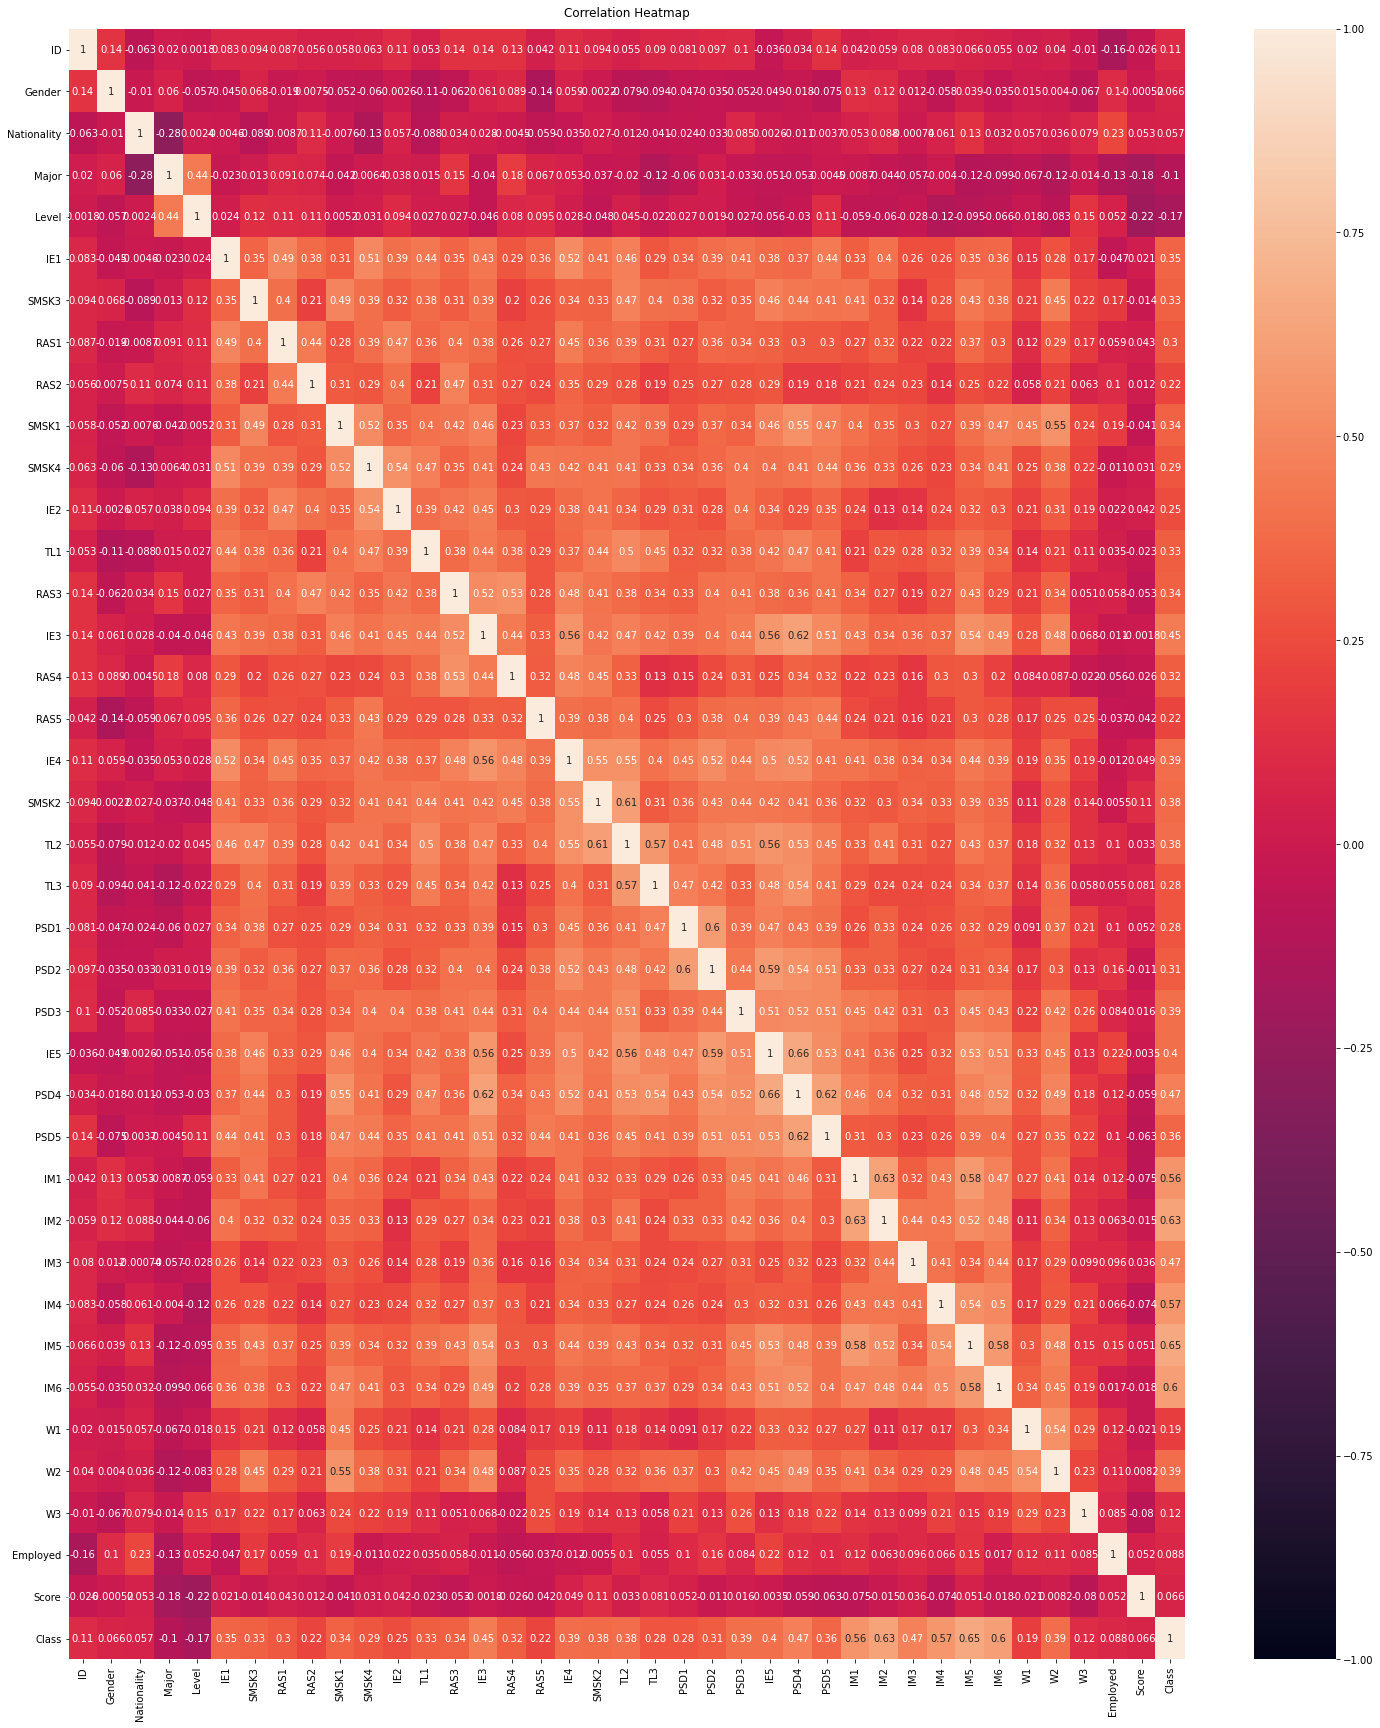

In [ ]:
plt.figure(figsize=(25,30))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);


# Cleaning the Data

missing values in column W1,W2,W3,Employed



In [ ]:

data['Employed']=data.Employed.fillna(0)

In [ ]:
data['Employed'].describe()

count    260.000000
mean       0.842308
std        0.365155
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Employed, dtype: float64

replace NaN values in columns w1 w2 and w3 using loop

In [ ]:
cols_to_clear=['W1','W2','W3']
for col in cols_to_clear:
  Av=data[col].mean()  
  data[col]=data[col].fillna(float(int(Av)))


In [ ]:
data.W1.describe()

count    260.000000
mean       3.319231
std        0.825519
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: W1, dtype: float64

In [ ]:
data.W2.describe()

count    260.000000
mean       3.373077
std        0.778107
min        1.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        4.000000
Name: W2, dtype: float64

In [ ]:
data.W3.describe()

count    260.000000
mean       2.457692
std        1.051813
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: W3, dtype: float64

In [ ]:
data.head(100)

,ID,Gender,Nationality,Major,Level,IE1,SMSK3,RAS1,RAS2,SMSK1,SMSK4,IE2,TL1,RAS3,IE3,RAS4,RAS5,IE4,SMSK2,TL2,TL3,PSD1,PSD2,PSD3,IE5,PSD4,PSD5,IM1,IM2,IM3,IM4,IM5,IM6,W1,W2,W3,Employed,Score,Class
0,1,0,1,0,2,4,3,4,4,2,3,3,3,4,3,3,2,4,3,3,4,3,3,4,3,3,3,4,4,4,4,4,4,4.0,4.0,4.0,1.0,3.20,1
1,2,0,0,0,2,4,4,4,4,3,3,4,4,3,4,4,2,4,4,4,4,4,3,3,4,4,3,3,4,4,3,4,4,3.0,4.0,3.0,0.0,3.82,1
2,3,0,1,0,1,3,2,3,4,3,3,4,2,4,3,3,2,3,3,2,3,2,3,3,3,3,3,4,4,3,4,4,3,4.0,4.0,2.0,1.0,3.75,1
3,4,1,1,1,3,4,4,4,4,4,3,4,4,4,4,4,3,4,3,3,4,3,4,3,3,4,4,4,4,4,4,4,4,3.0,4.0,4.0,1.0,3.70,1
4,5,0,0,0,2,4,3,3,4,3,3,4,4,4,3,3,3,3,3,3,3,4,3,4,3,3,4,3,3,4,3,3,3,4.0,4.0,2.0,1.0,3.82,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,0,0,2,4,2,4,4,1,4,3,3,3,1,1,1,3,2,4,3,2,3,2,2,2,2,2,3,4,1,2,2,3.0,2.0,3.0,1.0,3.89,0
96,97,0,0,0,2,3,3,3,2,2,3,3,3,2,3,2,2,3,3,2,4,3,3,2,2,3,3,2,2,3,3,3,3,4.0,4.0,3.0,1.0,4.00,0
97,98,0,0,1,2,4,3,3,4,3,3,3,3,4,4,3,2,3,3,3,4,3,3,2,3,3,2,3,3,3,2,3,3,3.0,3.0,1.0,0.0,3.80,0
98,99,0,0,1,2,4,4,4,4,4,4,4,4,4,4,4,3,4,4,4,4,4,4,4,4,4,4,4,3,4,3,4,4,4.0,4.0,2.0,1.0,3.76,1


# Feature selection using Filter method

In [ ]:
data[data.columns[0:]].corr()['Class'][:]

ID             0.106668
Gender         0.065965
Nationality    0.057075
Major         -0.102595
Level         -0.166755
IE1            0.345818
SMSK3          0.333166
RAS1           0.299659
RAS2           0.222100
SMSK1          0.341658
SMSK4          0.292276
IE2            0.250596
TL1            0.326554
RAS3           0.335256
IE3            0.451840
RAS4           0.323762
RAS5           0.221946
IE4            0.389139
SMSK2          0.378890
TL2            0.383764
TL3            0.281280
PSD1           0.283396
PSD2           0.313474
PSD3           0.391756
IE5            0.398372
PSD4           0.466937
PSD5           0.357722
IM1            0.560797
IM2            0.629890
IM3            0.474933
IM4            0.568799
IM5            0.653149
IM6            0.604635
W1             0.200385
W2             0.392533
W3             0.123670
Employed       0.085017
Score          0.066289
Class          1.000000
Name: Class, dtype: float64

In [ ]:
#Correlation with output variable
cor=data.corr()
cor_target = abs(cor["Class"])
#discovering relevant correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

IE1      0.345818
SMSK3    0.333166
RAS1     0.299659
RAS2     0.222100
SMSK1    0.341658
SMSK4    0.292276
IE2      0.250596
TL1      0.326554
RAS3     0.335256
IE3      0.451840
RAS4     0.323762
RAS5     0.221946
IE4      0.389139
SMSK2    0.378890
TL2      0.383764
TL3      0.281280
PSD1     0.283396
PSD2     0.313474
PSD3     0.391756
IE5      0.398372
PSD4     0.466937
PSD5     0.357722
IM1      0.560797
IM2      0.629890
IM3      0.474933
IM4      0.568799
IM5      0.653149
IM6      0.604635
W1       0.200385
W2       0.392533
Class    1.000000
Name: Class, dtype: float64

In [ ]:
data.columns

Index(['ID', 'Gender', 'Nationality', 'Major', 'Level', 'IE1', 'SMSK3', 'RAS1',
       'RAS2', 'SMSK1', 'SMSK4', 'IE2', 'TL1', 'RAS3', 'IE3', 'RAS4', 'RAS5',
       'IE4', 'SMSK2', 'TL2', 'TL3', 'PSD1', 'PSD2', 'PSD3', 'IE5', 'PSD4',
       'PSD5', 'IM1', 'IM2', 'IM3', 'IM4', 'IM5', 'IM6', 'W1', 'W2', 'W3',
       'Employed', 'Score', 'Class'],
      dtype='object')

### eliminate features with low correlation with Class

In [ ]:
data=data.drop(['Gender', 'Nationality', 'Major', 'Level','Employed', 'Score'], axis=1)

In [ ]:
data.head()

,ID,IE1,SMSK3,RAS1,RAS2,SMSK1,SMSK4,IE2,TL1,RAS3,IE3,RAS4,RAS5,IE4,SMSK2,TL2,TL3,PSD1,PSD2,PSD3,IE5,PSD4,PSD5,IM1,IM2,IM3,IM4,IM5,IM6,W1,W2,W3,Class
0,1,4,3,4,4,2,3,3,3,4,3,3,2,4,3,3,4,3,3,4,3,3,3,4,4,4,4,4,4,4.0,4.0,4.0,1
1,2,4,4,4,4,3,3,4,4,3,4,4,2,4,4,4,4,4,3,3,4,4,3,3,4,4,3,4,4,3.0,4.0,3.0,1
2,3,3,2,3,4,3,3,4,2,4,3,3,2,3,3,2,3,2,3,3,3,3,3,4,4,3,4,4,3,4.0,4.0,2.0,1
3,4,4,4,4,4,4,3,4,4,4,4,4,3,4,3,3,4,3,4,3,3,4,4,4,4,4,4,4,4,3.0,4.0,4.0,1
4,5,4,3,3,4,3,3,4,4,4,3,3,3,3,3,3,3,4,3,4,3,3,4,3,3,4,3,3,3,4.0,4.0,2.0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      260 non-null    int64  
 1   IE1     260 non-null    int64  
 2   SMSK3   260 non-null    int64  
 3   RAS1    260 non-null    int64  
 4   RAS2    260 non-null    int64  
 5   SMSK1   260 non-null    int64  
 6   SMSK4   260 non-null    int64  
 7   IE2     260 non-null    int64  
 8   TL1     260 non-null    int64  
 9   RAS3    260 non-null    int64  
 10  IE3     260 non-null    int64  
 11  RAS4    260 non-null    int64  
 12  RAS5    260 non-null    int64  
 13  IE4     260 non-null    int64  
 14  SMSK2   260 non-null    int64  
 15  TL2     260 non-null    int64  
 16  TL3     260 non-null    int64  
 17  PSD1    260 non-null    int64  
 18  PSD2    260 non-null    int64  
 19  PSD3    260 non-null    int64  
 20  IE5     260 non-null    int64  
 21  PSD4    260 non-null    int64  
 22  PS

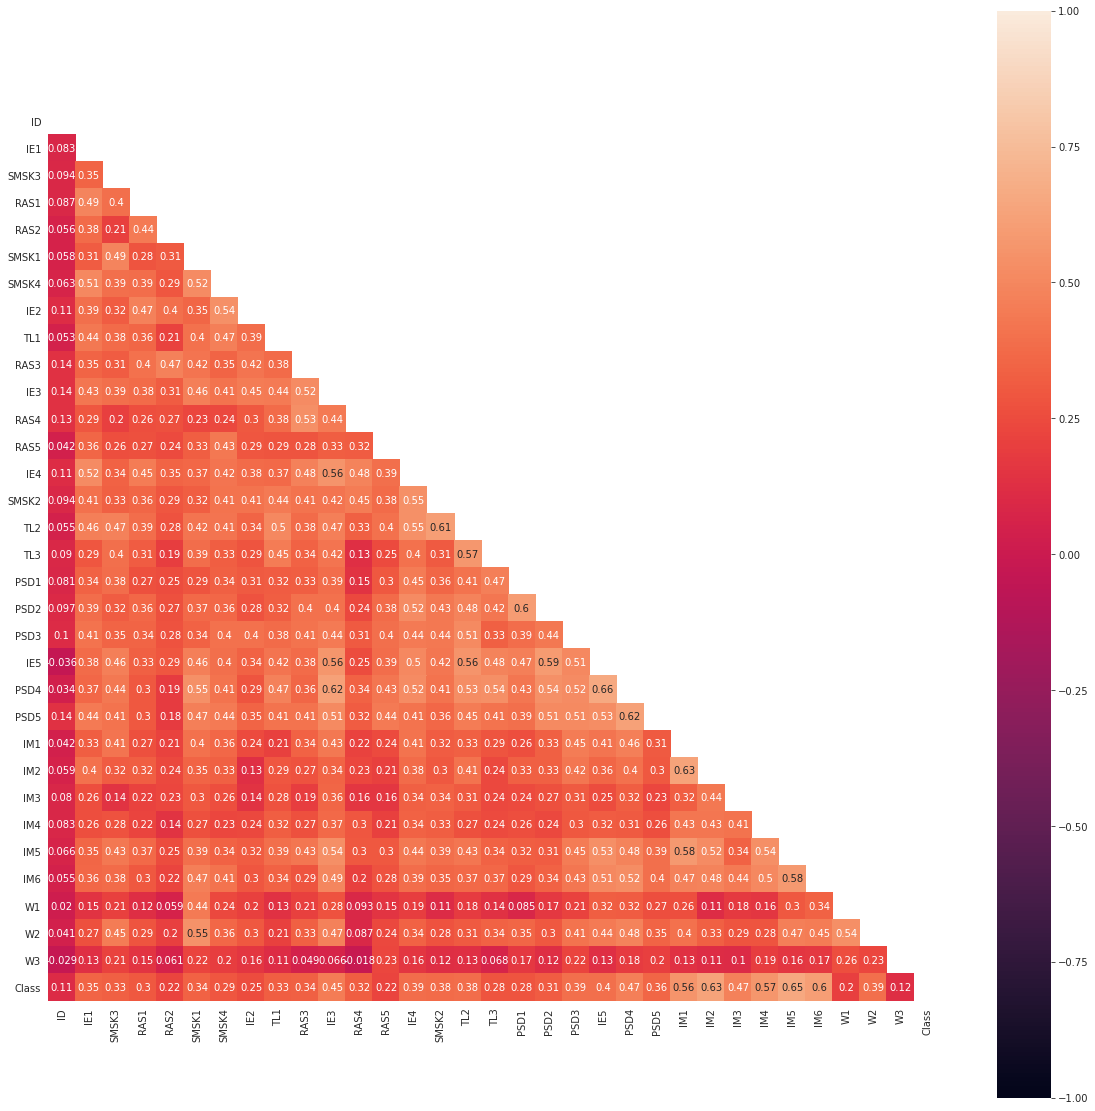

In [ ]:
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 20))
    ax = sns.heatmap(corr, mask=mask, vmin=-1,vmax=1,annot=True,square=True)

most correlated features with column Class

In [ ]:
#Correlation with output variable
cor=data.corr()
cor_target = abs(cor["Class"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

IM1      0.560797
IM2      0.629890
IM4      0.568799
IM5      0.653149
IM6      0.604635
Class    1.000000
Name: Class, dtype: float64

intercorrelation of features: before dropping unvaluable features we must verify if it is intercorrelated to prevent data degradation and low accuracy

In [ ]:
data[data.columns[1:32]].corr()['IE3'][:]

IE1      0.428848
SMSK3    0.391162
RAS1     0.377959
RAS2     0.314216
SMSK1    0.464174
SMSK4    0.406346
IE2      0.446106
TL1      0.437807
RAS3     0.517764
IE3      1.000000
RAS4     0.438957
RAS5     0.327612
IE4      0.558102
SMSK2    0.418301
TL2      0.465331
TL3      0.419151
PSD1     0.388279
PSD2     0.398731
PSD3     0.443398
IE5      0.564727
PSD4     0.617347
PSD5     0.509034
IM1      0.429695
IM2      0.344946
IM3      0.358414
IM4      0.368871
IM5      0.537405
IM6      0.492313
W1       0.278697
W2       0.471393
W3       0.065541
Name: IE3, dtype: float64

In [ ]:

cor=data.corr()
cor_target = abs(cor["IE5"])

relevant_features = cor_target[cor_target>0.5]
relevant_features

IE3     0.564727
IE4     0.501818
TL2     0.556557
PSD2    0.587681
PSD3    0.506410
IE5     1.000000
PSD4    0.663685
PSD5    0.528852
IM5     0.533532
IM6     0.506244
Name: IE5, dtype: float64

In [ ]:
relevant_features.index

Index(['IE3', 'IE4', 'TL2', 'PSD2', 'PSD3', 'IE5', 'PSD4', 'PSD5', 'IM5',
       'IM6'],
      dtype='object')

In [ ]:
relevant_features.axes

[Index(['IE3', 'IE4', 'TL2', 'PSD2', 'PSD3', 'IE5', 'PSD4', 'PSD5', 'IM5',
        'IM6'],
       dtype='object')]

## Normalisation & pca

# Applying principle component analysis to reduce features for  to have better accuracy

In [ ]:
from sklearn.decomposition import PCA
l=data.loc[:,['IE3', 'IE4', 'TL2', 'PSD2', 'PSD3', 'IE5', 'PSD4', 'PSD5', 'IM5','IM6']]
pca = PCA(n_components=1)
C1=pca.fit_transform(l)

In [ ]:
C1[:10]

array([[-0.43611106],
       [-1.45048715],
       [ 0.81363572],
       [-1.32763507],
       [ 0.19578845],
       [ 0.7313184 ],
       [ 1.13557867],
       [-1.50555024],
       [-0.66185768],
       [-1.39355182]])

In [ ]:
#data=data.drop(['IE3', 'IE4', 'TL2', 'PSD2', 'PSD3', 'IE5', 'PSD4', 'PSD5', 'IM5','IM6'], axis=1)

In [ ]:
cor=data.corr()
cor_target = abs(cor["W2"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

SMSK1    0.547520
W1       0.535171
W2       1.000000
Name: W2, dtype: float64

In [ ]:
relevant_features.index

Index(['SMSK1', 'W1', 'W2'], dtype='object')

In [ ]:
l2=data.loc[:,['SMSK1', 'W1', 'W2']]
pca = PCA(n_components=1)
C2=pca.fit_transform(l2)

In [ ]:
cor=data.corr()
cor_target = abs(cor["IM4"])

relevant_features = cor_target[cor_target>0.5]
relevant_features

IM4      1.000000
IM5      0.538558
IM6      0.502379
Class    0.568799
Name: IM4, dtype: float64

In [ ]:
l3=data.loc[:,['IM1','IM2']]
pca = PCA(n_components=1)
C3=pca.fit_transform(l3)

In [ ]:
C4=data.loc[:,['IM4']].values

now reduce the features into one column

In [ ]:
l5 = np.concatenate([C1,C2,C3,C4], axis=1)
X=pca.fit_transform(l5)
X

array([[-8.28040248e-01],
       [-1.18661969e+00],
       [-8.07607450e-02],
       [-1.81842808e+00],
       [ 1.33977431e-01],
       [ 2.89142878e-01],
       [ 1.12835503e+00],
       [-2.20338633e+00],
       [-1.05203129e+00],
       [-1.87646512e+00],
       [-2.34678281e+00],
       [ 1.63788624e+00],
       [-2.61106689e+00],
       [ 1.80023773e+00],
       [-1.40986965e+00],
       [-6.80046550e-01],
       [ 4.47746394e-01],
       [ 3.89268125e+00],
       [-1.59416628e+00],
       [-3.25568480e-01],
       [-1.11624613e+00],
       [ 3.97627758e-01],
       [-8.62485430e-01],
       [ 9.23484315e-01],
       [ 2.64384491e+00],
       [-4.50458184e-01],
       [-4.34132455e-01],
       [ 8.80832529e-01],
       [-2.86182073e+00],
       [-1.09044343e+00],
       [-1.67837439e+00],
       [ 8.84960056e-01],
       [-6.13631742e-01],
       [-1.30973671e-01],
       [-8.61416725e-01],
       [ 1.12420788e+00],
       [-8.77098653e-01],
       [-1.58425552e+00],
       [-1.7

Normalisation

In [ ]:
#Normalize the features
from sklearn.preprocessing import StandardScaler

X= StandardScaler().fit_transform(X) 

In [ ]:
X

array([[-4.05134657e-01],
       [-5.80576561e-01],
       [-3.95137517e-02],
       [-8.89701003e-01],
       [ 6.55510417e-02],
       [ 1.41468728e-01],
       [ 5.52069453e-01],
       [-1.07804925e+00],
       [-5.14726593e-01],
       [-9.18096743e-01],
       [-1.14820874e+00],
       [ 8.01367425e-01],
       [-1.27751482e+00],
       [ 8.80801020e-01],
       [-6.89805913e-01],
       [-3.32725887e-01],
       [ 2.19068557e-01],
       [ 1.90456936e+00],
       [-7.79976593e-01],
       [-1.59290656e-01],
       [-5.46144942e-01],
       [ 1.94547048e-01],
       [-4.21987627e-01],
       [ 4.51832508e-01],
       [ 1.29355210e+00],
       [-2.20395352e-01],
       [-2.12407674e-01],
       [ 4.30964299e-01],
       [-1.40020097e+00],
       [-5.33520472e-01],
       [-8.21177033e-01],
       [ 4.32983771e-01],
       [-3.00231162e-01],
       [-6.40813938e-02],
       [-4.21464743e-01],
       [ 5.50040384e-01],
       [-4.29137428e-01],
       [-7.75127561e-01],
       [-8.3

In [ ]:
Y=data.iloc[:,-1].values
Y

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0])

Split the data into training and test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X,Y, test_size=0.33)

Logistic regression is a performant classifier for binary classification

In [ ]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions = logisticRegr.predict(X_test)
print(predictions)

[0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0
 0 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1
 0 1 1 1 0 1 0 0 1 0 0 1]


In [ ]:
score = logisticRegr.score(X_test, y_test)
print(score)

0.8372093023255814


In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test,predictions,pos_label=1,)
print('F1 score: %f' % f1)

F1 score: 0.844444


## Another try using the highly correlated features with class




In [ ]:
data.head()

,ID,IE1,SMSK3,RAS1,RAS2,SMSK1,SMSK4,IE2,TL1,RAS3,IE3,RAS4,RAS5,IE4,SMSK2,TL2,TL3,PSD1,PSD2,PSD3,IE5,PSD4,PSD5,IM1,IM2,IM3,IM4,IM5,IM6,W1,W2,W3,Class
0,1,4,3,4,4,2,3,3,3,4,3,3,2,4,3,3,4,3,3,4,3,3,3,4,4,4,4,4,4,4.0,4.0,4.0,1
1,2,4,4,4,4,3,3,4,4,3,4,4,2,4,4,4,4,4,3,3,4,4,3,3,4,4,3,4,4,3.0,4.0,3.0,1
2,3,3,2,3,4,3,3,4,2,4,3,3,2,3,3,2,3,2,3,3,3,3,3,4,4,3,4,4,3,4.0,4.0,2.0,1
3,4,4,4,4,4,4,3,4,4,4,4,4,3,4,3,3,4,3,4,3,3,4,4,4,4,4,4,4,4,3.0,4.0,4.0,1
4,5,4,3,3,4,3,3,4,4,4,3,3,3,3,3,3,3,4,3,4,3,3,4,3,3,4,3,3,3,4.0,4.0,2.0,0


In [ ]:
A=data.loc[:,['IM1','IM2','IM4','IM5','IM6']]
pca = PCA(n_components=1)
X1=pca.fit_transform(A)


In [ ]:
X1= StandardScaler().fit_transform(X1)

In [ ]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y_train, y_test = train_test_split( X1,Y, test_size=0.33)

In [ ]:
logisticRegr.fit(X1_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions_X1 = logisticRegr.predict(X1_test)
print(predictions_X1)

[1 0 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0 1 0
 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0
 0 0 1 1 0 0 0 1 1 0 1 1]


In [ ]:
y_test

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1])

In [ ]:
score1 = logisticRegr.score(X1_test, y_test)
print(score1)

0.9651162790697675


In [ ]:
f1_X1 = f1_score(y_test,predictions_X1,pos_label=1,)
print('F1 score: %f' % f1_X1)

F1 score: 0.966292


we get a better accuracy 